In [93]:
import numpy as np
import pandas as pd

In [94]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [95]:
from datetime import datetime
from dateutil.parser import parse

* 读取的数据已经存在索引，使用index_col可以指定作为索引的的列的位置  
* 切记，若不设置parse_dates=True的话，默认read_csv读取csv文件后的index也就是索引类型是Object，不是DatetimeIndex，切记！！！

In [96]:
# 结果文件所在路径
filepath=r"result/201711.csv"
f = open(filepath)
columns=['AT','BP','DT','HU','RN','SL','VB','WD','WL','WS','WT']
result=pd.read_csv(f,index_col=0,parse_dates=True)
result.head()

,AT,BP,DT,HU,RN,SL,VB,WD,WL,WS,WT
2017-11-01 00:00:00,25.9,1015.9,NaN,60.0,NaN,31.4,NaN,36.0,205.0,2.2,26.8
2017-11-01 01:00:00,25.5,1015.9,NaN,62.0,NaN,31.3,NaN,35.0,200.0,1.4,26.6
2017-11-01 02:00:00,25.3,1015.8,NaN,62.0,NaN,31.3,NaN,39.0,195.0,1.8,26.6
2017-11-01 03:00:00,25.4,1015.9,NaN,60.0,NaN,31.4,NaN,51.0,186.0,1.8.1,26.6
2017-11-01 04:00:00,25.2,1015.3,NaN,61.0,NaN,31.4,NaN,36.1,170.0,2.1,26.7


### 获取11月1日的全天的气温数据
#### result[['AT']]与result['AT']的区别？
* result[[]]是一个dataframe  

* result[] 是一个series

In [97]:
result_at=result[['AT']]
result_at.head()
type(result_at)

pandas.core.frame.DataFrame

In [98]:
se=result['AT']
type(se)

pandas.core.series.Series

* 查看series的index的类型

In [99]:
se.index

DatetimeIndex(['2017-11-01 00:00:00', '2017-11-01 01:00:00',
               '2017-11-01 02:00:00', '2017-11-01 03:00:00',
               '2017-11-01 04:00:00', '2017-11-01 05:00:00',
               '2017-11-01 06:00:00', '2017-11-01 07:00:00',
               '2017-11-01 08:00:00', '2017-11-01 09:00:00',
               ...
               '2017-11-30 14:00:00', '2017-11-30 15:00:00',
               '2017-11-30 16:00:00', '2017-11-30 17:00:00',
               '2017-11-30 18:00:00', '2017-11-30 19:00:00',
               '2017-11-30 20:00:00', '2017-11-30 21:00:00',
               '2017-11-30 22:00:00', '2017-11-30 23:00:00'],
              dtype='datetime64[ns]', length=720, freq=None)

In [100]:
datetime(2017,11,1)

datetime.datetime(2017, 11, 1, 0, 0)

In [101]:
se[datetime(2017,11,1)]

25.899999999999999

In [92]:
se['2017/11/1']

2017-11-01 00:00:00    25.9
2017-11-01 01:00:00    25.5
2017-11-01 02:00:00    25.3
2017-11-01 03:00:00    25.4
2017-11-01 04:00:00    25.2
2017-11-01 05:00:00    25.1
2017-11-01 06:00:00    25.0
2017-11-01 07:00:00    25.0
2017-11-01 08:00:00    24.8
2017-11-01 09:00:00    24.8
2017-11-01 10:00:00    24.8
2017-11-01 11:00:00    25.0
2017-11-01 12:00:00    26.3
2017-11-01 13:00:00    28.5
2017-11-01 14:00:00    29.6
2017-11-01 15:00:00    30.6
2017-11-01 16:00:00    31.1
2017-11-01 17:00:00    31.9
2017-11-01 18:00:00    32.4
2017-11-01 19:00:00    30.5
2017-11-01 20:00:00    28.7
2017-11-01 21:00:00    27.4
2017-11-01 22:00:00    26.9
2017-11-01 23:00:00    26.6
Name: AT, dtype: float64

In [102]:
# KeyError: '1/11/2017'
result_at['1/11/2017']

KeyError: '1/11/2017'

### 绘制该月该站点的气温折线图
* 1 绘制11月1日的气温趋势图
* 2 设置Y轴的最大最小值

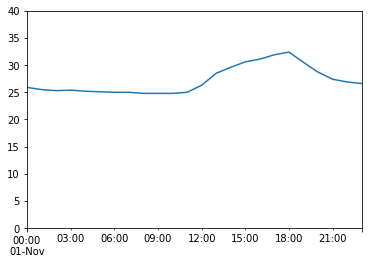

In [109]:
se['2017/11/1'].plot()
plt.ylim(0,40)
# plt.figure(dpi=300)
plt.figure(figsize=(60,1))
plt.show()

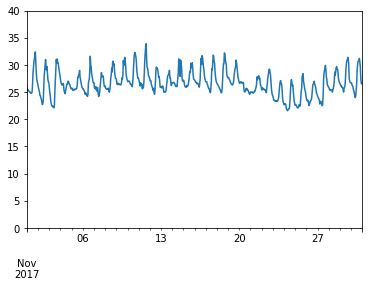

In [111]:
import pylab as pl
se.plot()
plt.ylim(0,40)
plt.figure(dpi=100)
plt.show()

In [42]:
plt.figure()
plt.plot(close_at['AT'])
plt.show()

,AT


KeyError: '2017-11-01 00:00:00'

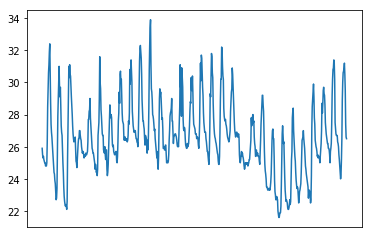

In [53]:
months=mdates.MonthLocator()
days=mdates.DayLocator()
timeFmt=mdates.DateFormatter('%Y-%m-%d')
fig,ax=plt.subplots()
plt.plot(close_at)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_major_locator(days)
plt.show()

In [55]:
close_at['AT'].index

Index(['2017-11-01 00:00:00', '2017-11-01 01:00:00', '2017-11-01 02:00:00',
       '2017-11-01 03:00:00', '2017-11-01 04:00:00', '2017-11-01 05:00:00',
       '2017-11-01 06:00:00', '2017-11-01 07:00:00', '2017-11-01 08:00:00',
       '2017-11-01 09:00:00',
       ...
       '2017-11-30 14:00:00', '2017-11-30 15:00:00', '2017-11-30 16:00:00',
       '2017-11-30 17:00:00', '2017-11-30 18:00:00', '2017-11-30 19:00:00',
       '2017-11-30 20:00:00', '2017-11-30 21:00:00', '2017-11-30 22:00:00',
       '2017-11-30 23:00:00'],
      dtype='object', length=720)

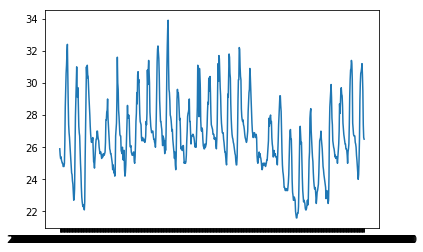